# Homicide rates around the world from 2000 to 2016

<img src="https://www.news10.com/wp-content/uploads/sites/64/2021/11/BODY-FOUND.jpg?w=1280">

### Hello and thanks for having a look at this little project.

### I am using a csv file which I found at https://data.world/, great site.

### We start by importing pandas and matplotlib

In [167]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 

### Lets import our csv and call it 'data'.

In [168]:
data = pd.read_csv("homicides_total.csv", encoding = "ISO-8859-1", header=0)
data.head()

,Continent,Subregion,Country,Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,Eastern Africa,Burundi,BDI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,341,376,347,349,500,520,564,461,635
1,Africa,Eastern Africa,Comoros,COM,56,NaN,NaN,NaN,NaN,58,...,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,60,NaN
2,Africa,Eastern Africa,Djibouti,DJI,64,NaN,NaN,NaN,NaN,63,...,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,60,NaN
3,Africa,Eastern Africa,Eritrea,ERI,335,NaN,NaN,NaN,NaN,382,...,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,390,NaN
4,Africa,Eastern Africa,Ethiopia,ETH,"7,113",NaN,NaN,NaN,NaN,"7,214",...,NaN,NaN,NaN,"7,419",NaN,NaN,NaN,NaN,"7,552",NaN


### There is a lot of cleaning to do. Lets start by eliminating all NaN values

In [169]:
# Before eliminating all NaN values, I am creating a separate dataframe with the values of 2010, for the Choropleth Map that we will see later
data2010 = data[["Country", "Code", "2010"]].copy()

data.dropna(inplace=True)
data.head()

,Continent,Subregion,Country,Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
38,Africa,Southern Africa,South Africa,ZAF,"21,758","21,405","21,553","19,824","18,793","18,528",...,"18,400","18,084","16,767","15,893","15,554","16,213","17,023","17,805","18,673","19,016"
60,Americas,Caribbean,Bahamas,BHM,74,43,52,50,44,52,...,78,73,87,94,127,111,119,123,146,111
64,Americas,Caribbean,Cuba,CUB,587,605,661,642,660,684,...,568,515,565,505,534,621,674,600,619,572
68,Americas,Caribbean,Grenada,GRD,15,6,14,9,6,11,...,11,16,7,10,4,14,6,8,6,11
71,Americas,Caribbean,Jamaica,JAM,887,"1,139","1,045",975,"1,471","1,674",...,"1,584","1,619","1,683","1,447","1,133","1,099","1,201","1,005","1,208","1,354"


### A bit better. Now lets check whether the values in the columns 2000 to 2016 are actually integers or strings.

In [170]:
# This shows that the values are actually strings
type(data["2016"][38])

str

### They are strings. We have to change those values to integers, but we have to do some formatting before.

### Lets start by replacing the '-' symbols with '0's (note Liechtenstein for example)

In [171]:
columns_to_clean = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]
for col in columns_to_clean:
    for char in col:
        data[col] = data[col].astype(str).str.replace("-", "0")
data.tail()

,Continent,Subregion,Country,Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
197,Europe,Western Europe,Germany,DEU,"1,015",925,955,859,868,869,...,757,722,803,793,738,659,682,716,682,963
198,Europe,Western Europe,Liechtenstein,LIE,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
201,Europe,Western Europe,Netherlands,NLD,180,202,195,202,191,174,...,143,150,154,144,143,145,125,123,104,94
202,Europe,Western Europe,Switzerland,CHE,69,86,86,73,78,75,...,51,54,51,52,46,45,57,41,57,45
203,Oceania,Australia and New Zealand,Australia,AUS,362,347,366,341,302,259,...,255,261,263,231,248,243,245,243,236,227


### Now lets eliminate the commas, empty spaces and other unwanted values, then we can turn all values into integers

In [172]:
chars_to_remove = [",", " ", "n", "a", "NaN"]
for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])
data.tail()

,Continent,Subregion,Country,Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
197,Europe,Western Europe,Germany,DEU,1015,925,955,859,868,869,...,757,722,803,793,738,659,682,716,682,963
198,Europe,Western Europe,Liechtenstein,LIE,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
201,Europe,Western Europe,Netherlands,NLD,180,202,195,202,191,174,...,143,150,154,144,143,145,125,123,104,94
202,Europe,Western Europe,Switzerland,CHE,69,86,86,73,78,75,...,51,54,51,52,46,45,57,41,57,45
203,Oceania,Australia and New Zealand,Australia,AUS,362,347,366,341,302,259,...,255,261,263,231,248,243,245,243,236,227


### Now we are ready to start playing with the data.

### For example, we can see the countries with the largest and the smallest number of homicides in 2016.

### (Feel free to change the variable in the first line of code to visualise other years)

In [200]:
#You can change the next variable to any other year, as long as it is between 2000 and 2016
year_to_check="2016"

max_index = data[year_to_check].idxmax()
min_index = data[year_to_check].idxmin()
print(f"The country with the largest number of homicides in {year_to_check} was {data['Country'][max_index]} with a total of {data['2016'].max()} homicides.")
print(f"Country with the smallest smallest number of homicides in {year_to_check} was {data['Country'][min_index]} with a total of {data['2016'].min()} homicides.")

The country with the largest number of homicides in 2016 was Brazil with a total of 61283 homicides.
Country with the smallest smallest number of homicides in 2016 was Liechtenstein with a total of 0 homicides.


### Now lets create a bar chart to visualise these figures in 2016.

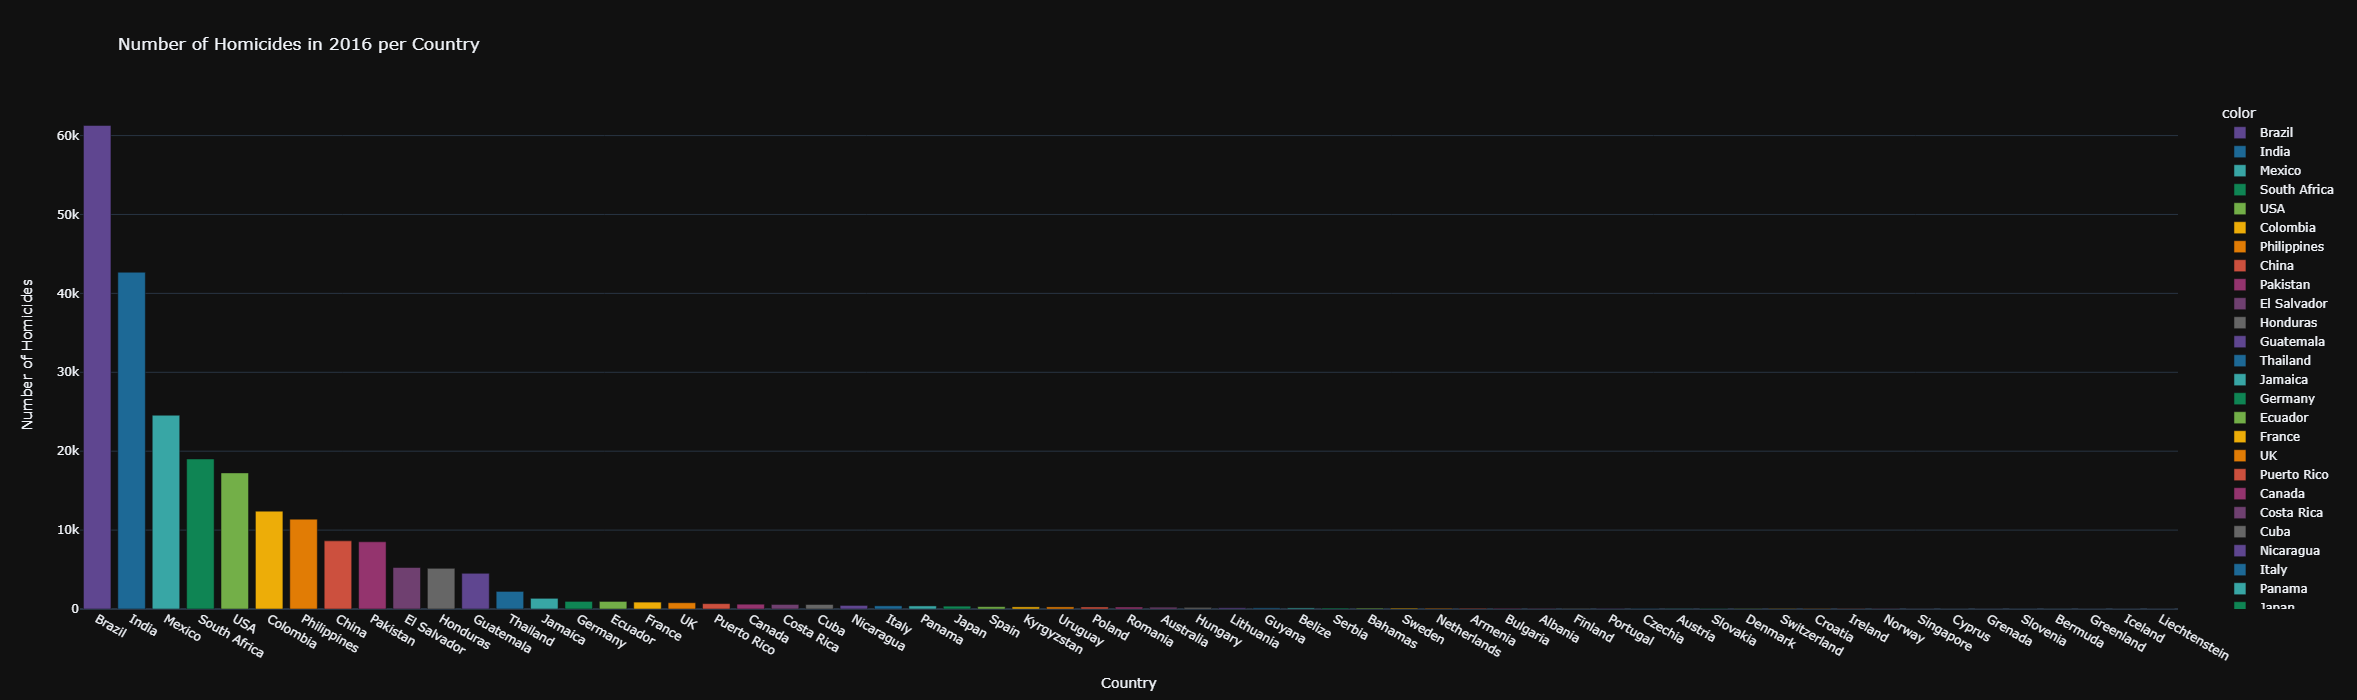

In [203]:
#You can change the next variable to any other year, as long as it is between 2000 and 2016
year_to_check = "2016"

homicide_2016 = data[["Country", year_to_check]].sort_values(year_to_check, ascending=False)     

bar = px.bar(x = homicide_2016["Country"],
             y = homicide_2016[year_to_check],
             title = f"Number of Homicides in {year_to_check} per Country",
             color = homicide_2016["Country"], 
             template="plotly_dark",
             color_discrete_sequence=px.colors.qualitative.Prism)

bar.update_layout(xaxis_title = "Country",
                  yaxis_title = "Number of Homicides",
                  height=700,
                  coloraxis_showscale=False)

bar.show()

### The numbers in Brazil are truly concerning. Maybe the Olimpics played some part on it?

### Lets now see a pie chart to visualise and compare where are these crimes happening.

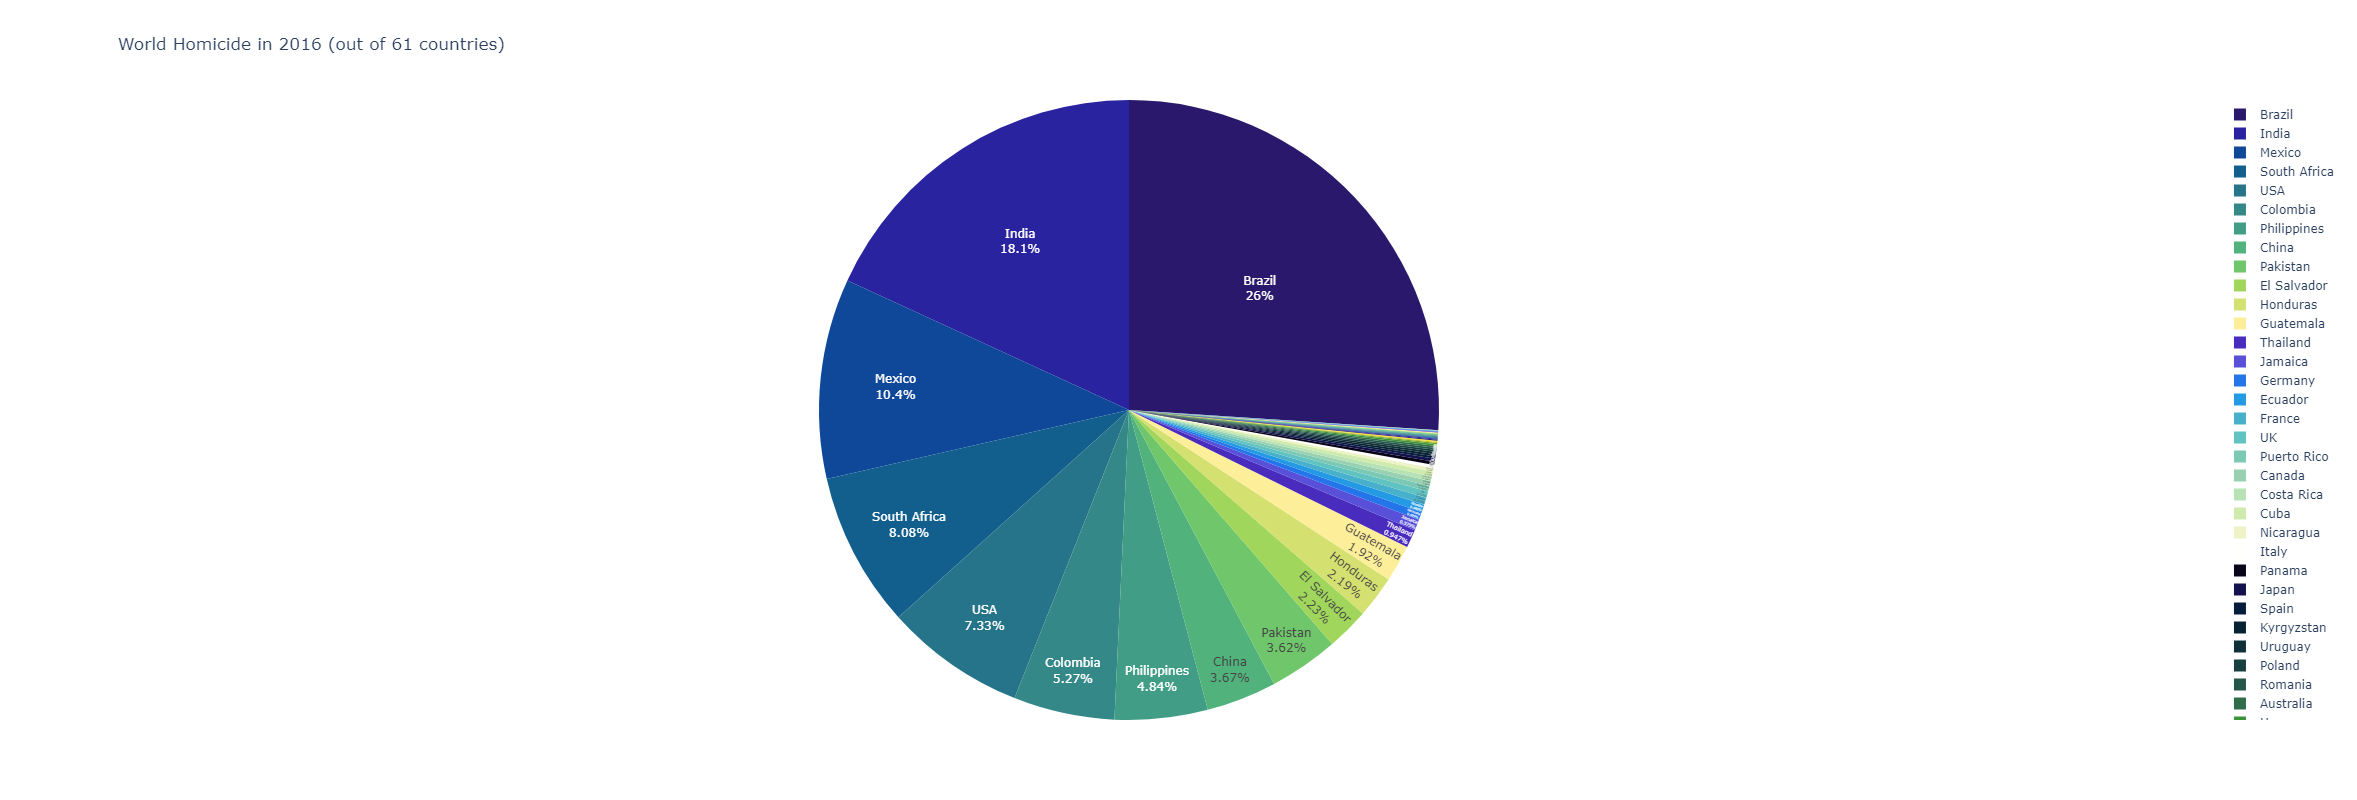

In [175]:
year_to_check = "2016"
number_of_countries = data[year_to_check].count()

murder_pie = px.pie(labels = data["Country"],
                    values = data[year_to_check],
                    title = f"World Homicide in {year_to_check} (out of {number_of_countries} countries)",
                    names = data["Country"],
                    width=800,
                    height=800,
                    color_discrete_sequence=px.colors.sequential.haline)

murder_pie.update_traces(textposition="inside",
                         textinfo="percent+label")

murder_pie.show()

### Please let me clarify that this data does not mean that 26% of homicides happen in Brazil: unfortunately our data had too many NaN values, and what we are looking at are the values of only 61 countries out of the original list of 222.

### We can clearly see that these countries with very high figures are also countries with very dense populations. Fortunately, we also have another dataframe which tells how many homicides happen in these countries per 100,000 inhabitants. To keep things simple (and save me some typing), lets call this dataframe 'data2'.

In [176]:
data2 = pd.read_csv("homicides_per_100000_population.csv", encoding = "ISO-8859-1", header=0)
data2.head()

,Subregion,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,4.4,4,3.9,5.4,5.4,5.7,4.5,6
1,Eastern Africa,Comoros,10.4,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,7.7,NaN
2,Eastern Africa,Djibouti,8.9,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,7.4,NaN,NaN,NaN,NaN,6.5,NaN
3,Eastern Africa,Eritrea,9.9,NaN,NaN,NaN,NaN,9.6,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,NaN,8,NaN
4,Eastern Africa,Ethiopia,10.7,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,7.6,NaN


### Same as before, we will start by cleaning the dataframe:
<ol>
    <li>Eliminate NaN values</li>
    <li>Replace '-' symbols with '0's</li>
    <li>Eliminate commas, etc</li>
    <li>Convert to integers all values from columns 2000 to 2016</li>
            

In [177]:
# Step 1
data2.dropna(inplace=True)

In [178]:
# Step 2
for col in columns_to_clean:
    for char in col:
        data2[col] = data2[col].astype(str).str.replace("-", "0")

In [179]:
# Step 3
for col in columns_to_clean:
    for char in chars_to_remove:
        data2[col] = data2[col].astype(str).str.replace(char, "")
    # Step 4
    data2[col] = pd.to_numeric(data2[col])
data2.head()

,Subregion,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
38,Southern Africa,South Africa,47.6,46.1,45.8,41.6,39.0,38.0,38.7,36.9,35.9,32.9,30.8,29.8,30.6,31.7,32.6,33.8,34.0
60,Caribbean,Bahamas,24.8,14.2,16.8,15.8,13.6,15.8,18.2,22.8,20.9,24.5,26.1,34.6,29.8,31.5,32.2,37.7,28.4
64,Caribbean,Cuba,5.3,5.4,5.9,5.7,5.9,6.1,5.1,5.0,4.6,5.0,4.5,4.7,5.5,5.9,5.2,5.4,5.0
68,Caribbean,Grenada,14.8,5.9,13.7,8.8,5.8,10.7,11.6,10.6,15.4,6.7,9.6,3.8,13.3,5.7,7.5,5.6,10.2
71,Caribbean,Jamaica,33.4,42.5,38.8,35.9,53.9,61.0,48.5,57.1,58.0,60.0,51.4,40.0,38.7,42.1,35.1,42.1,47.0


### Lets quickly see the values for 2016 to compare with the former dataframe

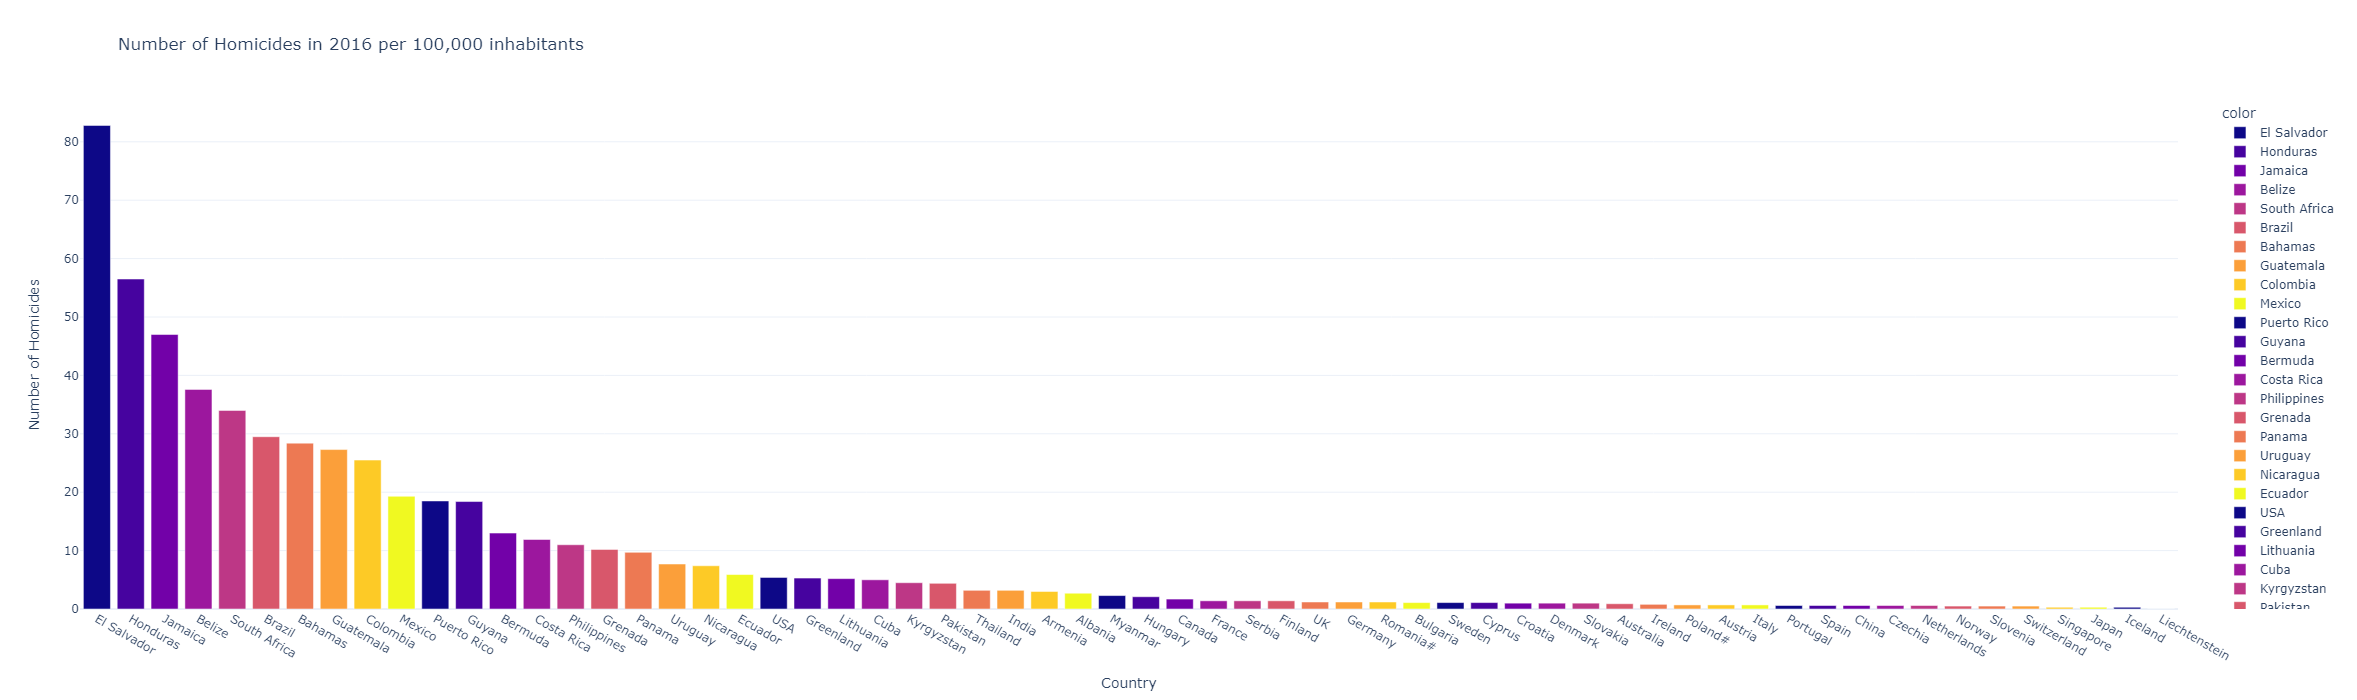

In [210]:
year_to_check="2016"

homicide2 = data2[["Country", year_to_check]].sort_values(year_to_check, ascending=False)     

bar = px.bar(x = homicide2["Country"],
             y = homicide2[year_to_check],
             title = f"Number of Homicides in {year_to_check} per 100,000 inhabitants",
             color = homicide2["Country"],
             template="plotly_white",
             color_discrete_sequence=px.colors.sequential.Plasma,
             )

bar.update_layout(xaxis_title = "Country",
                  yaxis_title = "Number of Homicides",
                  coloraxis_showscale = False,
                  width=1600,
                  height=700,)

bar.show()

### On a curious turn of events, we see El Salvador taking the lead, with 82.8 homicides per each 100,000 of its inhabitants, followed by other countries which did also not have a very predominant place previously.

### Has this always been like this for these countries? We can check the progression in the number of homicides from 2000 up to 2016. 
### Lets start by creating a new dataframe with the 10 countries with the highest number of homicides from these years according to this more recent dataframe. We also need to eliminate the index and 'Subregion' column.

In [181]:
data2.sort_values(by="2016", inplace=True, ascending=False)
top10 = data2.head(10)

# Eliminate 'Subregion' Column
top10_clean = top10.drop(["Subregion"], axis=1)

#Eliminate index from dataframe
top10_clean.set_index('Country', inplace=True)
top10_clean.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
El Salvador,60.5,60.8,47.7,56.2,64.9,64.4,64.8,57.5,52.0,71.4,64.7,70.6,41.7,40.2,62.4,105.4,82.8
Honduras,48.7,52.1,52.8,57.9,50.5,43.6,41.3,46.5,56.6,65.7,76.1,85.1,84.3,74.3,66.9,57.5,56.5
Jamaica,33.4,42.5,38.8,35.9,53.9,61.0,48.5,57.1,58.0,60.0,51.4,40.0,38.7,42.1,35.1,42.1,47.0
Belize,16.6,25.1,33.2,24.9,28.6,28.6,31.6,32.5,33.6,30.9,40.1,37.7,43.1,28.8,35.0,33.1,37.6
South Africa,47.6,46.1,45.8,41.6,39.0,38.0,38.7,36.9,35.9,32.9,30.8,29.8,30.6,31.7,32.6,33.8,34.0


### Then we need to transpose the whole dataframe (convert columns into rows and rows into columns)

In [182]:
transposed_data2 = top10_clean.transpose()
transposed_data2.tail()

Country,El Salvador,Honduras,Jamaica,Belize,South Africa,Brazil,Bahamas,Guatemala,Colombia,Mexico
2012,41.7,84.3,38.7,43.1,30.6,26.5,29.8,33.8,35.1,21.5
2013,40.2,74.3,42.1,28.8,31.7,26.8,31.5,33.7,32.6,18.8
2014,62.4,66.9,35.1,35.0,32.6,28.0,32.2,31.4,27.9,16.1
2015,105.4,57.5,42.1,33.1,33.8,28.4,37.7,29.4,26.5,16.5
2016,82.8,56.5,47.0,37.6,34.0,29.5,28.4,27.3,25.5,19.3


### And now we can create our chart

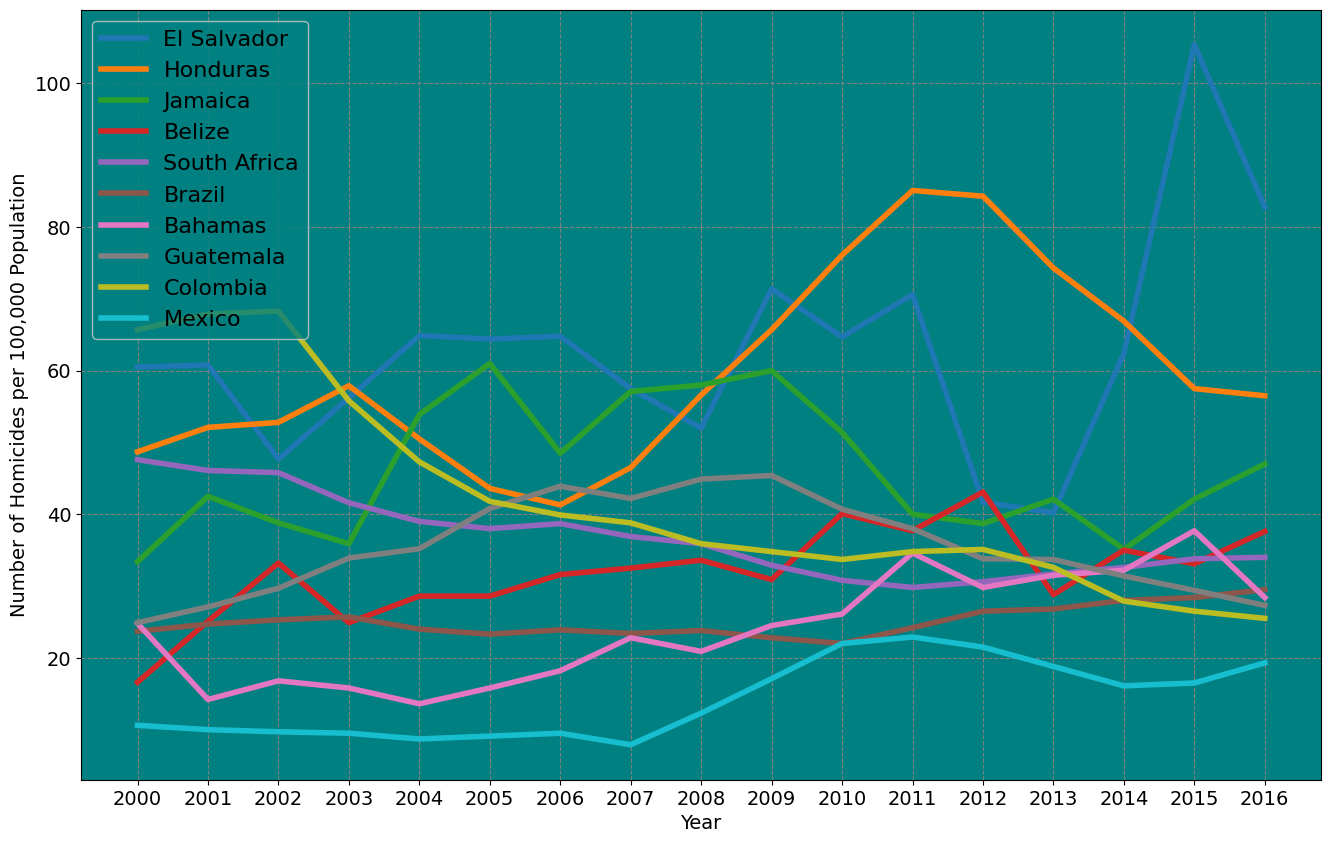

In [183]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Homicides per 100,000 Population", fontsize=14)

plt.grid(color='grey', linestyle='--')

for col in transposed_data2.columns:
    plt.plot(transposed_data2.index, transposed_data2[col],
            linewidth=4,
            label=transposed_data2[col].name)
    
plt.rcParams['axes.facecolor'] = 'teal'

plt.legend(fontsize=16)

plt.show()

### El Salvador reached a very high peak of 105 homicides per 100,000 inhabitants in 2015. Fortunately, we see this value going down in 2016, and I have heard this country is moving forwards in the right direction nowadays.

### We can also visualise our data in a Choropleth Map. For this, we will use the dataframe 'data2010', which we need to clean first (had we cleaned it before, we would have lost many rows):

In [211]:
data2010.dropna(inplace=True)
columns = ["2010"]

for col in columns:
    for char in col:
        data2010[col] = data2010[col].astype(str).str.replace("-", "0")
        
for col in columns:
    for char in chars_to_remove:
        data2010[col] = data2010[col].astype(str).str.replace(char, "")
    data2010[col] = pd.to_numeric(data2010[col])
    
data2010

,Country,Code,2010
0,Burundi,BDI,347
1,Comoros,COM,59
2,Djibouti,DJI,63
3,Eritrea,ERI,389
4,Ethiopia,ETH,7419
...,...,...,...
212,Micronesia,FSM,5
215,American Samoa,ASM,5
219,Samoa,WSM,16
220,Tonga,TON,1


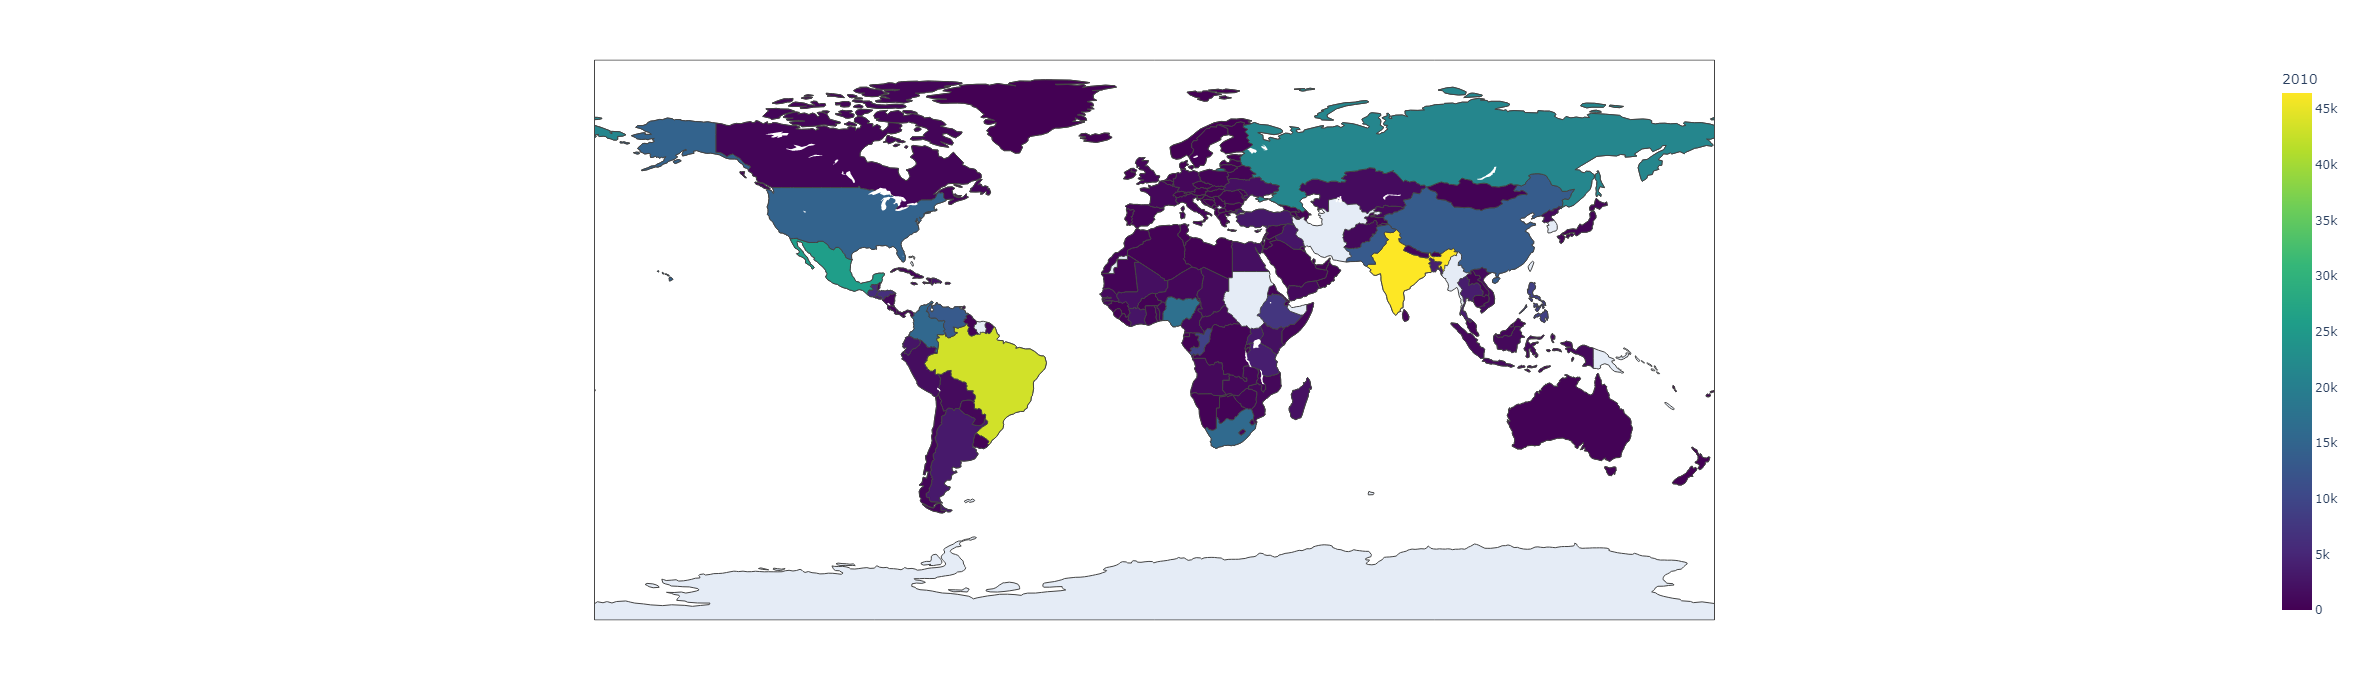

In [185]:
world_map = px.choropleth(data2010,
                          locations="Code",
                          color="2010",
                          width=1400,
                          height=700,
                          hover_name="Country",
                          color_continuous_scale="Viridis")

world_map.show()

### Finally, we are going to create a sunburst chart divided first by Continent, then by Subregion, and then by Country.
### This is an interactive chart where you can click on any of the continents or subregions to see the data in more detail.

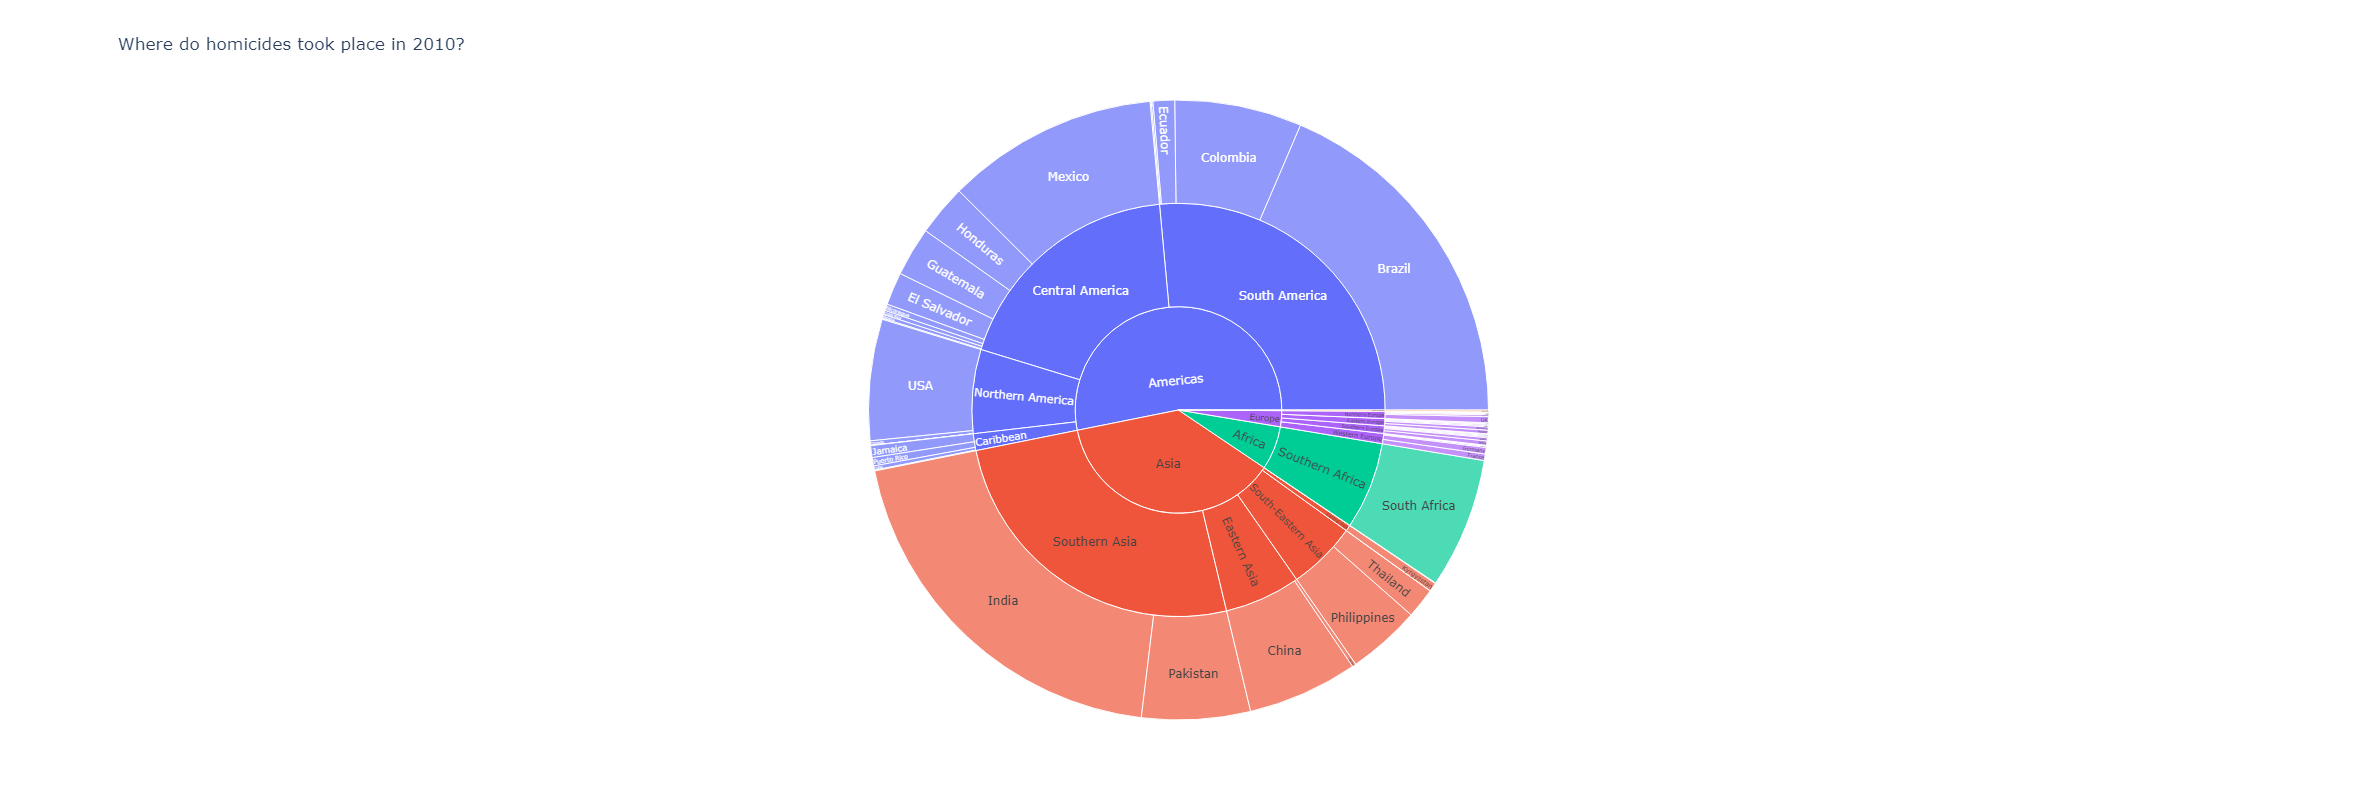

In [214]:
year_to_check="2010"

burst = px.sunburst(data,
                    path=["Continent", "Subregion", "Country"],
                    values=year_to_check,
                    title=f"Where do homicides took place in {year_to_check}?")

burst.update_layout(xaxis_title="Number of Homicides",
                    yaxis_title="Country",
                    coloraxis_showscale=False,
                    width=800,
                    height=800,)

burst.show()